<a href="https://colab.research.google.com/github/LitoleNINJA/Spaceship-Titanic/blob/main/Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline

In [44]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [45]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


# **DATA CLEANING**

In [46]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Change Categorical Columns to Numerical

In [47]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['Transported'] = labelEncoder.fit_transform(df['Transported'])
df['VIP'] = labelEncoder.fit_transform(df['VIP'])
df['CryoSleep'] = labelEncoder.fit_transform(df['CryoSleep'])
df['HomePlanet'] = labelEncoder.fit_transform(df['HomePlanet'])
df['Destination'] = labelEncoder.fit_transform(df['Destination'])
df['Cabin'] = labelEncoder.fit_transform(df['Cabin'])
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


Drop NA values

In [48]:
for col in df[df.columns[0:-1]]:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(value = df[col].mean())
    else:
        df[col] = df[col].fillna(value = df[col].mode()[0])

In [49]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Normalize DataFrame

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)
df.describe()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.239733,0.199643,0.492051,0.505081,0.364911,0.034798,0.015683,0.015365,0.007395,0.013885,0.012632,0.503624
std,0.287801,0.269173,0.307668,0.280049,0.181507,0.166935,0.046049,0.053481,0.025431,0.050191,0.046959,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.204421,0.333333,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.490549,0.666667,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.333333,0.500000,0.764939,0.666667,0.468354,0.000000,0.005444,0.003958,0.001916,0.003972,0.002942,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.333333,0.0,0.022713,0.666667,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.332927,0.666667,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0
2,0.333333,0.0,0.000152,0.666667,0.734177,0.5,0.003001,0.119948,0.000000,0.299670,0.002030,0.0
3,0.333333,0.0,0.000152,0.666667,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0
4,0.000000,0.0,0.333232,0.666667,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.333333,0.0,0.022256,0.000000,0.518987,0.5,0.000000,0.228726,0.000000,0.073322,0.003066,0.0
8689,0.000000,0.5,0.804878,0.333333,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8690,0.000000,0.0,0.805640,0.666667,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,1.0
8691,0.333333,0.0,0.324848,0.000000,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.0


# **DATA VISUALIZATION**

In [11]:
import seaborn as sns

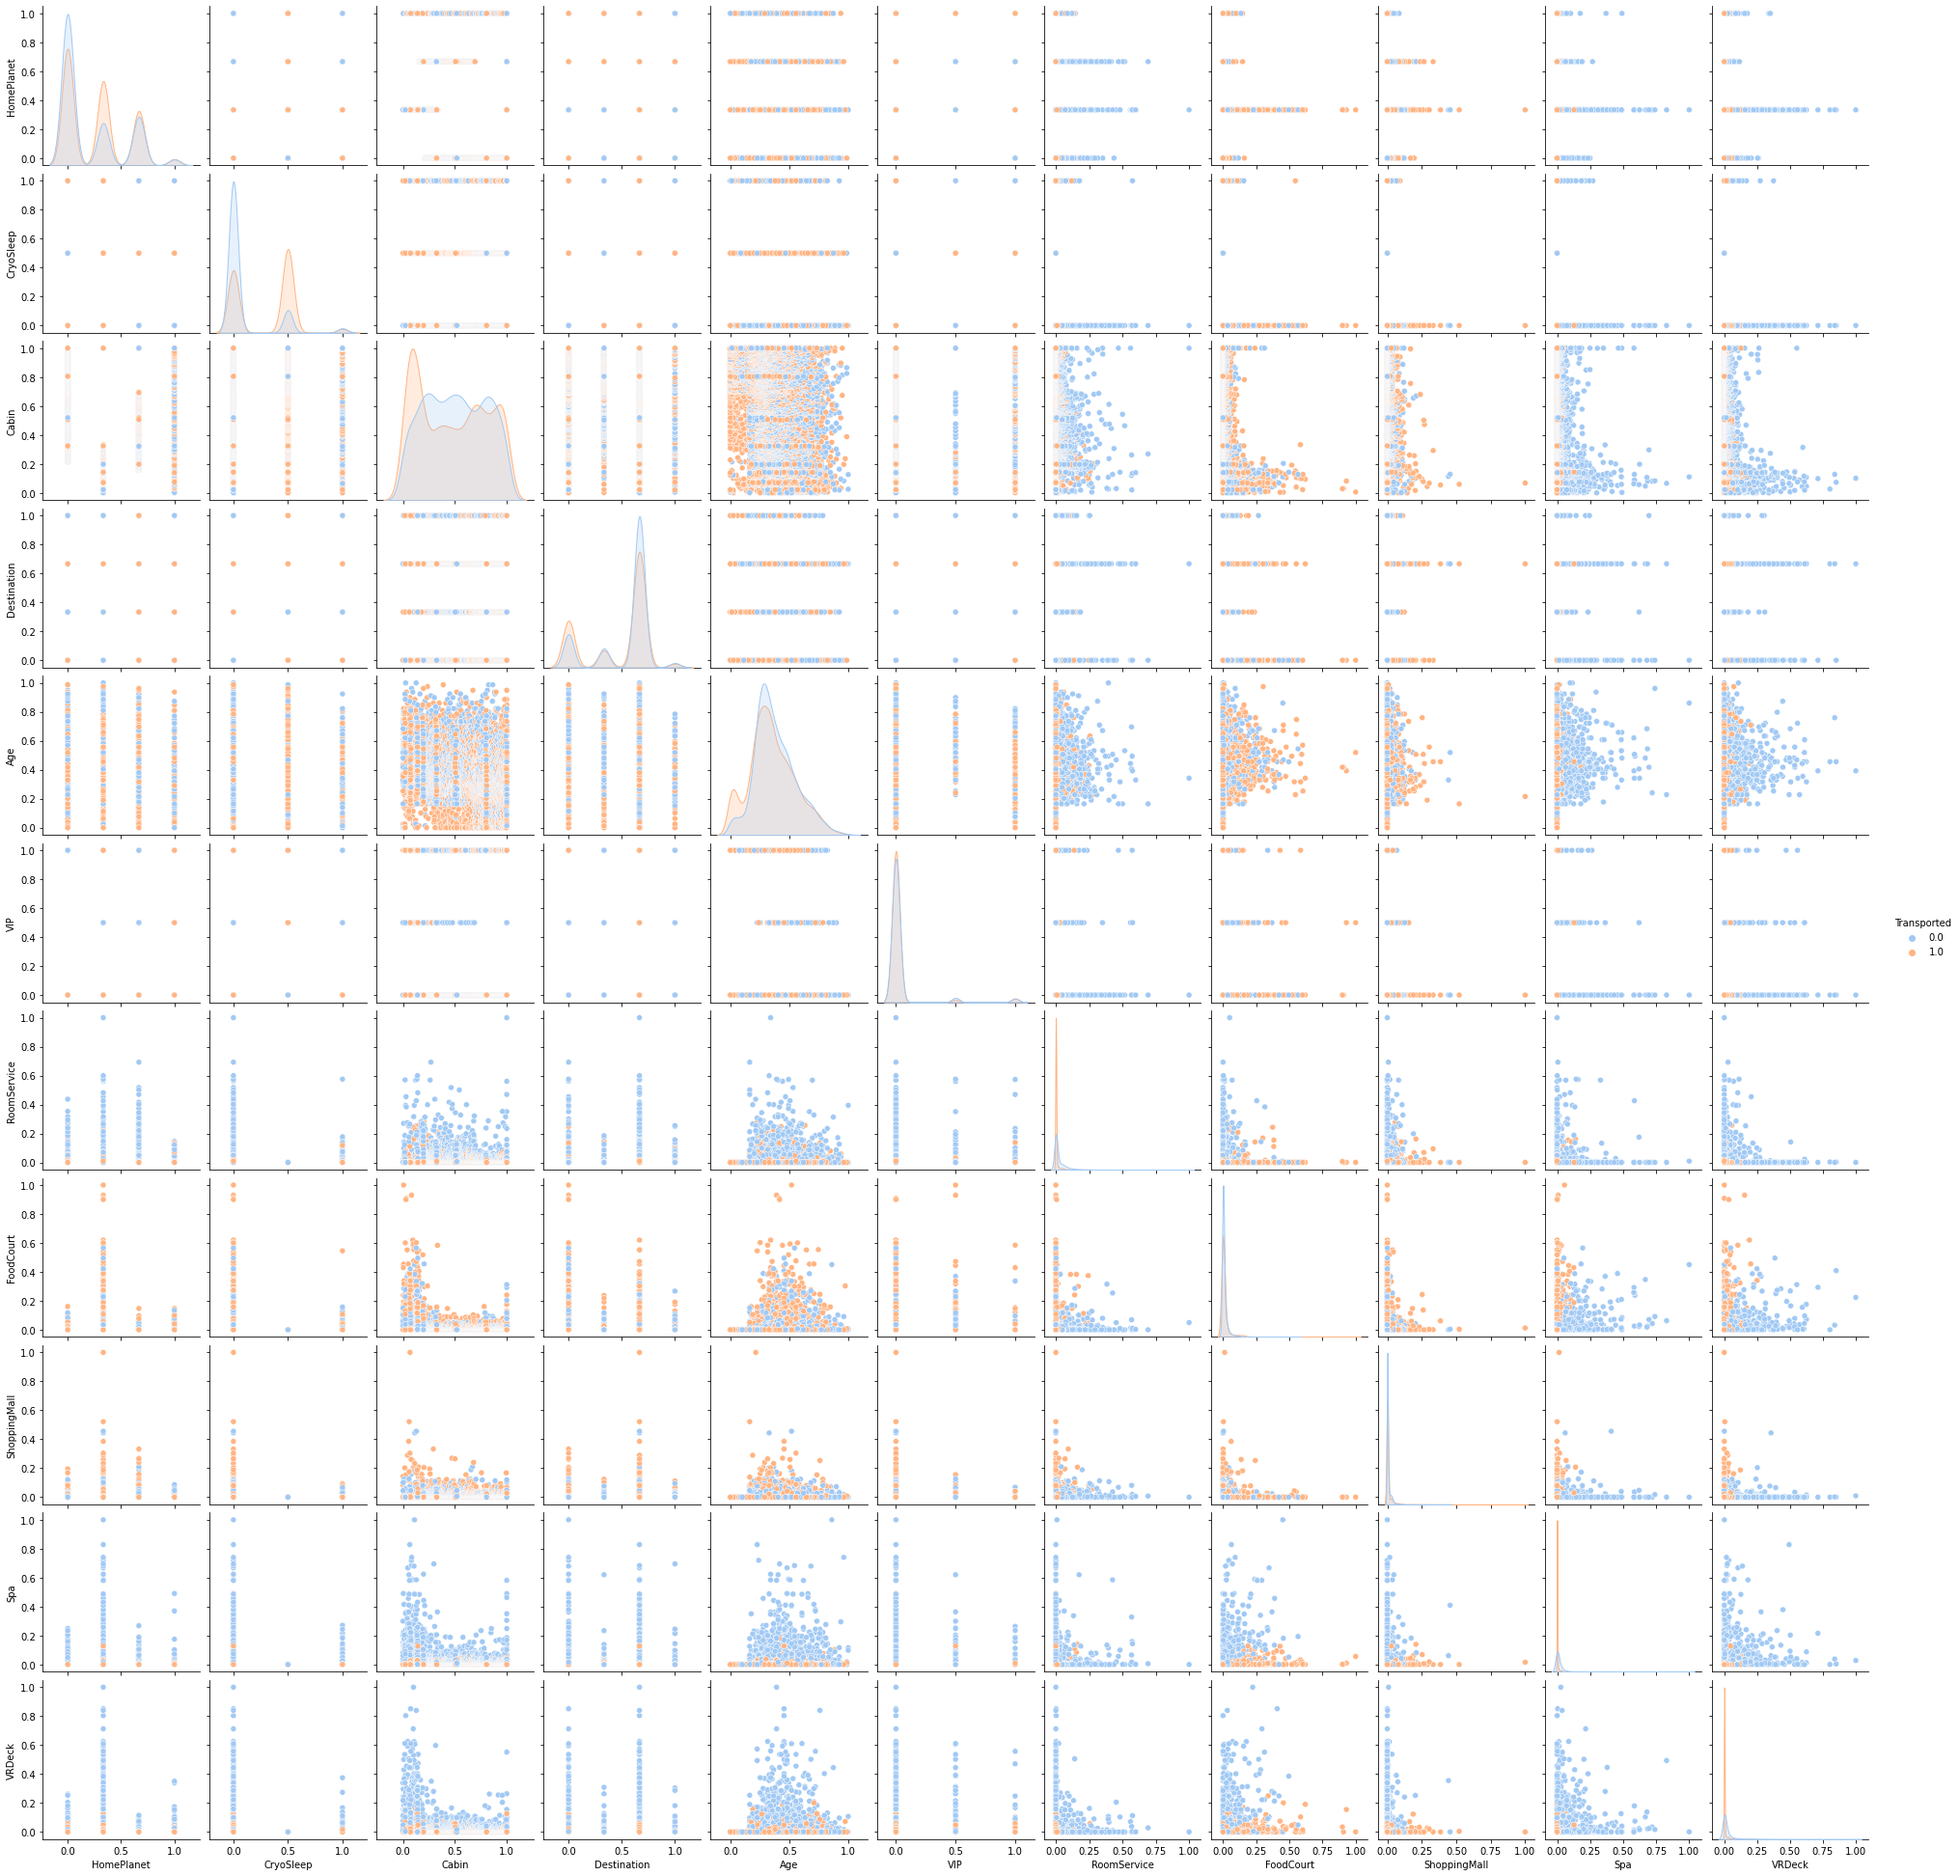

In [12]:
# sns.pairplot(df, hue='Transported', palette='pastel')
# plt.show()

# **MODEL**

In [52]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
label = 'Transported'
X = df.drop(label, axis=1)
y = df[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 6085
Test cases: 2608


Find Best Parameter

In [54]:
from sklearn.model_selection import GridSearchCV
lgbm = LGBMClassifier(random_state=0)
grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 8, 12], 'learning_rate': [0.05, 0.1, 0.15]}
clf = GridSearchCV(estimator=lgbm, param_grid=grid, n_jobs=-1, cv=None)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
0.8052588331963847


Train the Model

In [21]:
rfc = RandomForestClassifier()
grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 8, 12, 16], 'max_features': ['sqrt', 'log2']}
clf = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 150}
0.7984686422453584


In [25]:
knn = KNeighborsClassifier()
grid = {'n_neighbors': [1, 3, 5, 7, 10], 
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30, 45, 60]}
clf = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'distance'}
0.7433464448551197


In [55]:
model = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [56]:
from sklearn. metrics import accuracy_score, precision_score, recall_score
print("Accuracy:",accuracy_score(y_test, pred))
print("Precision:",precision_score(y_test, pred, average='macro'))
print("Recall:",recall_score(y_test, pred, average='macro'))

Accuracy: 0.8002300613496932
Precision: 0.8012851082314446
Recall: 0.8002073023350182


# **SUBMMISSION**

In [57]:
model.fit(X, y)

LGBMClassifier(max_depth=4, n_estimators=200, random_state=0)

In [58]:
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [59]:
passenger_id = test["PassengerId"]
test = test.drop(['PassengerId', 'Name'], axis=1)
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
test['VIP'] = labelEncoder.fit_transform(test['VIP'])
test['CryoSleep'] = labelEncoder.fit_transform(test['CryoSleep'])
test['HomePlanet'] = labelEncoder.fit_transform(test['HomePlanet'])
test['Destination'] = labelEncoder.fit_transform(test['Destination'])
test['Cabin'] = labelEncoder.fit_transform(test['Cabin'])
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [65]:
for col in test[test.columns[:]]:
    if test[col].dtype == 'float64':
        test[col] = test[col].fillna(value = test[col].mean())
    else:
        test[col] = test[col].fillna(value = test[col].mode()[0])
test.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test)
scaled = scaler.fit_transform(test)
test = pd.DataFrame(scaled, columns=test.columns)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   float64
 1   CryoSleep     4277 non-null   float64
 2   Cabin         4277 non-null   float64
 3   Destination   4277 non-null   float64
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   float64
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(11)
memory usage: 367.7 KB


In [66]:
predictions = model.predict(test)
predictions

array([0., 0., 1., ..., 1., 1., 1.])

In [67]:
submit =pd.read_csv('sample_submission.csv')
submit['Transported'] = predictions
submit=submit.replace({0:False, 1:True})
submit

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [69]:
submit.to_csv('submission.csv', index=False)

In [70]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>